# End-to-End Image Forgery detector

## Importing the data

In [ ]:
!wget https://github.com/Adwait01-Bhosale/Image_Forgery_Detector/blob/master/Image_Forgery.zip?raw=true

--2021-12-22 12:25:29--  https://github.com/Adwait01-Bhosale/Image_Forgery_Detector/blob/master/Image_Forgery.zip?raw=true
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Adwait01-Bhosale/Image_Forgery_Detector/raw/master/Image_Forgery.zip [following]
--2021-12-22 12:25:29--  https://github.com/Adwait01-Bhosale/Image_Forgery_Detector/raw/master/Image_Forgery.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Adwait01-Bhosale/Image_Forgery_Detector/master/Image_Forgery.zip [following]
--2021-12-22 12:25:30--  https://raw.githubusercontent.com/Adwait01-Bhosale/Image_Forgery_Detector/master/Image_Forgery.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.gi

## Importing the helper functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-12-22 12:25:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-12-22 12:25:37 (54.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import helper functions we're going to use in this notebook
from helper_functions import create_tensorboard_callback,plot_loss_curves, unzip_data, walk_through_dir

## Unzipping the data

In [ ]:
!unzip /content/Image_Forgery.zip?raw=true

Archive:  /content/Image_Forgery.zip?raw=true
   creating: Image_Forgery/TESTING/
   creating: Image_Forgery/TESTING/ORIGINAL/
  inflating: Image_Forgery/TESTING/ORIGINAL/Im100_2_cm.jpg  
  inflating: Image_Forgery/TESTING/ORIGINAL/Im100_2_col.jpg  
  inflating: Image_Forgery/TESTING/ORIGINAL/Im100_2_r.jpg  
  inflating: Image_Forgery/TESTING/ORIGINAL/Im100_3_cm.jpg  
 extracting: Image_Forgery/TESTING/ORIGINAL/Im100_3_col.jpg  
  inflating: Image_Forgery/TESTING/ORIGINAL/Im100_3_r.jpg  
 extracting: Image_Forgery/TESTING/ORIGINAL/Im100_4_cm.jpg  
  inflating: Image_Forgery/TESTING/ORIGINAL/Im87_3_cm.jpg  
  inflating: Image_Forgery/TESTING/ORIGINAL/Im87_3_col.jpg  
  inflating: Image_Forgery/TESTING/ORIGINAL/Im87_3_r.jpg  
 extracting: Image_Forgery/TESTING/ORIGINAL/Im87_4_cm.jpg  
  inflating: Image_Forgery/TESTING/ORIGINAL/Im88_2_cm.jpg  
  inflating: Image_Forgery/TESTING/ORIGINAL/Im88_2_col.jpg  
  inflating: Image_Forgery/TESTING/ORIGINAL/Im88_2_r.jpg  
  inflating: Image_Forgery

In [ ]:
# Check out how many images and sub directory are there in our dataset
walk_through_dir("/content/Image_Forgery")

There are 2 directories and 0 images in '/content/Image_Forgery'.
There are 2 directories and 0 images in '/content/Image_Forgery/TRAINING'.
There are 0 directories and 643 images in '/content/Image_Forgery/TRAINING/ORIGINAL'.
There are 0 directories and 640 images in '/content/Image_Forgery/TRAINING/TAMPERED'.
There are 2 directories and 0 images in '/content/Image_Forgery/TESTING'.
There are 0 directories and 87 images in '/content/Image_Forgery/TESTING/ORIGINAL'.
There are 0 directories and 89 images in '/content/Image_Forgery/TESTING/TAMPERED'.


## Initiating the Trainining and Testing directories

In [ ]:
train_dir="/content/Image_Forgery/TRAINING"
test_dir="/content/Image_Forgery/TESTING"

## Prepairing the data for training and testing

In [ ]:
import tensorflow as tf

IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                               image_size=IMG_SIZE,
                                                               label_mode="categorical",
                                                               batch_size=BATCH_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                              image_size=IMG_SIZE,
                                                              label_mode="categorical",
                                                              batch_size=BATCH_SIZE)

Found 1283 files belonging to 2 classes.
Found 176 files belonging to 2 classes.


In [ ]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 2)), types: (tf.float32, tf.float32)>

In [ ]:
train_data.class_names

['ORIGINAL', 'TAMPERED']

In [ ]:
for images,labels in train_data.take(1):
  print(images,labels)

tf.Tensor(
[[[[230.60045  230.60045  230.60045 ]
   [230.60045  230.60045  230.60045 ]
   [230.60045  230.60045  230.60045 ]
   ...
   [163.       163.       163.      ]
   [163.       163.       163.      ]
   [164.46655  164.46655  164.46655 ]]

  [[231.9933   231.9933   231.9933  ]
   [231.9933   231.9933   231.9933  ]
   [231.9933   231.9933   231.9933  ]
   ...
   [163.       163.       163.      ]
   [163.       163.       163.      ]
   [164.46655  164.46655  164.46655 ]]

  [[243.98215  243.98215  243.98215 ]
   [243.98215  243.98215  243.98215 ]
   [243.98215  243.98215  243.98215 ]
   ...
   [163.       163.       163.      ]
   [163.       163.       163.      ]
   [164.46655  164.46655  164.46655 ]]

  ...

  [[147.99774  147.99774  147.99774 ]
   [147.99774  147.99774  147.99774 ]
   [147.99774  147.99774  147.99774 ]
   ...
   [112.678406 112.678406 112.678406]
   [107.59881  107.59881  107.59881 ]
   [127.73468  127.73468  127.73468 ]]

  [[148.22887  148.22887  148.2288

## Creating a function for viewing a random image

In [ ]:
import matplotlib.pyplot as plt
import random
import os
import matplotlib.image as mpimg

def view_random_image(target_dir,target_class):
  # Setting up the target directory(we'll view images from here)
  target_folder=target_dir+target_class

  # Get a random image path
  random_image=random.sample(os.listdir(target_folder),1)

  # Reading the image and plotting it using matplotlib
  img=mpimg.imread(target_folder+ "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (316, 505)


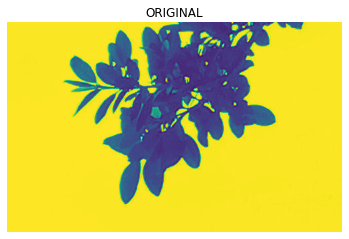

In [ ]:
img=view_random_image(target_dir="/content/Image_Forgery/TRAINING/",
                      target_class="ORIGINAL")

In [ ]:
# The images that we've shown above is an giant array of pixel values
print(tf.constant(img))

tf.Tensor(
[[254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 ...
 [255 255 255 ... 254 254 254]
 [255 255 255 ... 254 254 254]
 [255 255 255 ... 254 254 254]], shape=(316, 505), dtype=uint8)


In [ ]:
img.shape

(316, 505)

In [ ]:
img/255.

array([[0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       ...,
       [1.        , 1.        , 1.        , ..., 0.99607843, 0.99607843,
        0.99607843],
       [1.        , 1.        , 1.        , ..., 0.99607843, 0.99607843,
        0.99607843],
       [1.        , 1.        , 1.        , ..., 0.99607843, 0.99607843,
        0.99607843]])

## Building a CNN model

* Load our images
* Preprocess our images
* Build a CNN model to find patterns in our images
* Compile our CNN model
* Fit the CNN to our training data

In [ ]:
model_1=tf.keras.Sequential([tf.keras.layers.Conv2D(filters=10,
                                                    kernel_size=3,
                                                    activation="relu",
                                                    input_shape=(224,224,3)),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.MaxPool2D(pool_size=2,
                                                       padding="valid"),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.MaxPool2D(2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(2,activation="sigmoid")])

model_1.compile(optimizer="adam",
                metrics=["accuracy"],
                loss="binary_crossentropy")

In [ ]:
# Fitting the model
history=model_1.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_steps=len(test_data),
                    validation_data=test_data)

Epoch 1/5
41/41 [==============================] - 18s 138ms/step - loss: 7.5359 - accuracy: 0.5058 - val_loss: 0.7748 - val_accuracy: 0.6136
Epoch 2/5
41/41 [==============================] - 6s 128ms/step - loss: 0.6957 - accuracy: 0.6103 - val_loss: 0.7261 - val_accuracy: 0.6136
Epoch 3/5
41/41 [==============================] - 6s 137ms/step - loss: 0.6541 - accuracy: 0.6376 - val_loss: 0.7296 - val_accuracy: 0.6080
Epoch 4/5
41/41 [==============================] - 7s 137ms/step - loss: 0.6335 - accuracy: 0.6578 - val_loss: 0.7417 - val_accuracy: 0.6193
Epoch 5/5
41/41 [==============================] - 6s 125ms/step - loss: 0.6087 - accuracy: 0.6719 - val_loss: 0.7583 - val_accuracy: 0.6193


## Plotting the loss curves

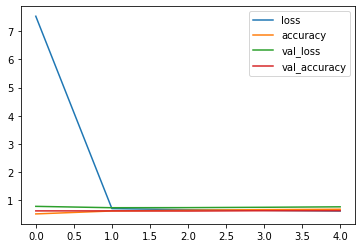

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

## Initializig the Early stopping callback

In [ ]:
early_stopping_callback=tf.keras.callbacks.EarlyStopping(restore_best_weights=True,
                                                         monitor="val_loss",
                                                         mode="min",
                                                         patience=10)

## Building Model_2

In [ ]:
model_2=tf.keras.Sequential([tf.keras.layers.Conv2D(filters=10,
                                                    kernel_size=3,
                                                    activation="relu",
                                                    input_shape=(224,224,3)),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.MaxPool2D(pool_size=2,
                                                       padding="valid"),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(2,activation="sigmoid")])

model_2.compile(optimizer="adam",
                metrics=["accuracy"],
                loss="binary_crossentropy")

In [ ]:
# Fitting the model
history_model_2=model_2.fit(train_data,
                    epochs=30,
                    steps_per_epoch=len(train_data),
                    validation_steps=len(test_data),
                    validation_data=test_data,
                    callbacks=[early_stopping_callback])

Epoch 1/30
41/41 [==============================] - 7s 126ms/step - loss: 3.0701 - accuracy: 0.5456 - val_loss: 0.7086 - val_accuracy: 0.5682
Epoch 2/30
41/41 [==============================] - 6s 123ms/step - loss: 0.6890 - accuracy: 0.5924 - val_loss: 0.6953 - val_accuracy: 0.5341
Epoch 3/30
41/41 [==============================] - 6s 122ms/step - loss: 0.6610 - accuracy: 0.6173 - val_loss: 0.7057 - val_accuracy: 0.5284
Epoch 4/30
41/41 [==============================] - 6s 138ms/step - loss: 0.6417 - accuracy: 0.6524 - val_loss: 0.7212 - val_accuracy: 0.5227
Epoch 5/30
41/41 [==============================] - 6s 121ms/step - loss: 0.6285 - accuracy: 0.6664 - val_loss: 0.7276 - val_accuracy: 0.5341
Epoch 6/30
41/41 [==============================] - 6s 125ms/step - loss: 0.6055 - accuracy: 0.6867 - val_loss: 0.7570 - val_accuracy: 0.5625
Epoch 7/30
41/41 [==============================] - 6s 124ms/step - loss: 0.5838 - accuracy: 0.7054 - val_loss: 0.7945 - val_accuracy: 0.5625
Epoch 

## Plotting the Loss Curves of `training` and `validation` data seperately

In [ ]:
def plot_loss_curves(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs=range(len(history.history['loss']))

  # Plot the loass curves
  plt.plot(epochs,loss,label="Training_Loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plotting the accuracy curves
  plt.plot(epochs,accuracy,label="Training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

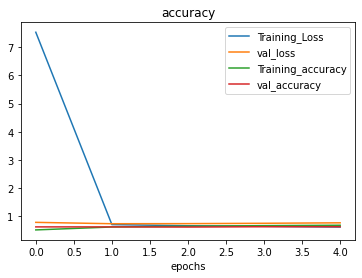

In [ ]:
plot_loss_curves(history)

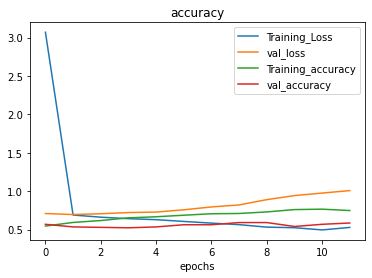

In [ ]:
plot_loss_curves(history_model_2)

## Creating the predict functions

In [ ]:
def load_and_prep_image(filename,img_shape=224):
  # Reading the image
  img=tf.io.read_file(filename)

  # Decode the read file into tensore
  img=tf.image.decode_image(img,channels=3)

  # Resize the image
  img=tf.image.resize(img,size=[img_shape,img_shape])

  # Rescale the image and rescale all the values between 0 and 1
  img=img/255.

  return img

In [ ]:
# Load in and prepricess our custom image
org=load_and_prep_image("/content/Image_Forgery/TESTING/ORIGINAL/Im100_2_cm.jpg")
org

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.32941177, 0.32941177, 0.32941177],
        [0.33521533, 0.33521533, 0.33521533],
        [0.37599182, 0.37599182, 0.37599182],
        ...,
        [0.11372549, 0.11372549, 0.11372549],
        [0.11571237, 0.11571237, 0.11571237],
        [0.12156863, 0.12156863, 0.12156863]],

       [[0.32941177, 0.32941177, 0.32941177],
        [0.33521533, 0.33521533, 0.33521533],
        [0.37446603, 0.37446603, 0.37446603],
        ...,
        [0.11509921, 0.11509921, 0.11509921],
        [0.11571237, 0.11571237, 0.11571237],
        [0.12156863, 0.12156863, 0.12156863]],

       [[0.32941177, 0.32941177, 0.32941177],
        [0.33521533, 0.33521533, 0.33521533],
        [0.37246147, 0.37246147, 0.37246147],
        ...,
        [0.11801937, 0.11801937, 0.11801937],
        [0.11571237, 0.11571237, 0.11571237],
        [0.12156863, 0.12156863, 0.12156863]],

       ...,

       [[0.18982232, 0.18982232, 0.18982232],
        [0.17

In [ ]:
pred=model_2.predict(tf.expand_dims(org,axis=0))
pred

array([[0.49777016, 0.50332505]], dtype=float32)

In [ ]:
class_names=train_data.class_names

In [ ]:
# We can index the predicted class by rounding the prediction probabilities and indexing it on the class names
import numpy as np

pred_class=class_names[int(np.argmax(tf.round(pred)))]
pred_class

'TAMPERED'

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  # Import the target image and preprocess it.
  img=load_and_prep_image(filename)

  # Make predictions 
  pred=model.predict(tf.expand_dims(img,axis=0))

  # Get the predicted class
  pred_class=class_names[int(np.argmax(tf.round(pred)))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False);

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the random seed
tf.random.set_seed(42)

# Preprocess the data
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

## Importing the data from directories and turn it into batches

In [ ]:
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='categorical',
                                             seed=42)

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='categorical',
                                             seed=42)

Found 1283 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


## Building Model_3

In [ ]:
model_3=tf.keras.Sequential([tf.keras.layers.Conv2D(filters=10,
                                                    kernel_size=3,
                                                    activation="relu",
                                                    input_shape=(224,224,3)),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.MaxPool2D(pool_size=2,
                                                       padding="valid"),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(2,activation="sigmoid")])

model_3.compile(optimizer="adam",
                metrics=["accuracy"],
                loss="binary_crossentropy")

In [ ]:
# Fit the model
history_3=model_3.fit(train_data,
                      epochs=20,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data),
                      callbacks=[early_stopping_callback])  

Epoch 1/20
41/41 [==============================] - 11s 243ms/step - loss: 0.7298 - accuracy: 0.5238 - val_loss: 0.6917 - val_accuracy: 0.4943
Epoch 2/20
41/41 [==============================] - 10s 233ms/step - loss: 0.6813 - accuracy: 0.5643 - val_loss: 0.6811 - val_accuracy: 0.5682
Epoch 3/20
41/41 [==============================] - 9s 229ms/step - loss: 0.6773 - accuracy: 0.5822 - val_loss: 0.6568 - val_accuracy: 0.6307
Epoch 4/20
41/41 [==============================] - 11s 277ms/step - loss: 0.6557 - accuracy: 0.6204 - val_loss: 0.6715 - val_accuracy: 0.5227
Epoch 5/20
41/41 [==============================] - 11s 278ms/step - loss: 0.6511 - accuracy: 0.6251 - val_loss: 0.6604 - val_accuracy: 0.6193
Epoch 6/20
41/41 [==============================] - 10s 232ms/step - loss: 0.6399 - accuracy: 0.6321 - val_loss: 0.6788 - val_accuracy: 0.5398
Epoch 7/20
41/41 [==============================] - 10s 236ms/step - loss: 0.6222 - accuracy: 0.6524 - val_loss: 0.6963 - val_accuracy: 0.6136


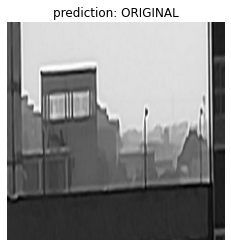

In [ ]:
pred_and_plot(model_3,"/content/Image_Forgery/TESTING/ORIGINAL/Im100_2_cm.jpg")

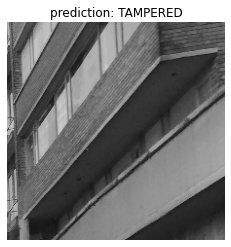

In [ ]:
pred_and_plot(model_3,"/content/Image_Forgery/TESTING/ORIGINAL/Im90_3_col.jpg")

## Building Model_4 with Transfer_learning.

In [ ]:
model_4=tf.keras.Sequential([tf.keras.layers.Conv2D(filters=10,
                                                    kernel_size=3,
                                                    activation="relu",
                                                    input_shape=(224,224,3)),
                             tf.keras.layers.Conv2D(100,3,activation="relu"),
                             tf.keras.layers.MaxPool2D(pool_size=2,
                                                       padding="valid"),
                             tf.keras.layers.Conv2D(100,3,activation="relu"),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.MaxPool2D(pool_size=2,
                                                       padding="same"),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(2,activation="sigmoid")])

model_4.compile(optimizer="adam",
                metrics=["accuracy"],
                loss="binary_crossentropy")

In [ ]:
# Fit the model
history_4=model_4.fit(train_data,
                      epochs=20,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data),
                      callbacks=[early_stopping_callback])  

Epoch 1/20
41/41 [==============================] - 16s 354ms/step - loss: 0.6973 - accuracy: 0.4786 - val_loss: 0.6927 - val_accuracy: 0.5227
Epoch 2/20
41/41 [==============================] - 14s 348ms/step - loss: 0.6908 - accuracy: 0.5339 - val_loss: 0.7554 - val_accuracy: 0.4943
Epoch 3/20
41/41 [==============================] - 15s 358ms/step - loss: 0.6836 - accuracy: 0.5635 - val_loss: 0.6435 - val_accuracy: 0.6364
Epoch 4/20
41/41 [==============================] - 14s 351ms/step - loss: 0.6661 - accuracy: 0.6064 - val_loss: 0.6972 - val_accuracy: 0.5284
Epoch 5/20
41/41 [==============================] - 15s 349ms/step - loss: 0.6679 - accuracy: 0.6181 - val_loss: 0.6562 - val_accuracy: 0.6307
Epoch 6/20
41/41 [==============================] - 14s 349ms/step - loss: 0.6471 - accuracy: 0.6228 - val_loss: 0.6551 - val_accuracy: 0.6023
Epoch 7/20
41/41 [==============================] - 15s 362ms/step - loss: 0.6406 - accuracy: 0.6578 - val_loss: 0.6733 - val_accuracy: 0.6477